Part 1


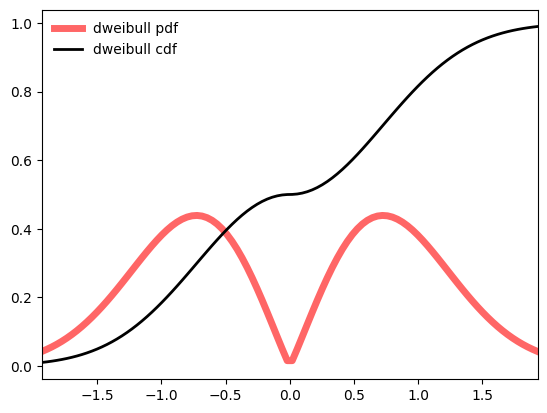

In [43]:

import numpy as np
from scipy.stats import dweibull
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
c = 2.07
mean, var, skew, kurt = dweibull.stats(c, moments='mvsk')
x = np.linspace(dweibull.ppf(0.01, c),
                dweibull.ppf(0.99, c), 100)
ax.plot(x, dweibull.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='dweibull pdf')
rv = dweibull(c)
ax.plot(x, rv.cdf(x), 'k-', lw=2, label='dweibull cdf')
vals = dweibull.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], dweibull.cdf(vals, c))
r = dweibull.rvs(c, size=1000)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()


In [44]:
dweibull.mean(c, loc=0, scale=1)

0.0

In [45]:
dweibull.var(c, loc=0, scale=1)

0.9861708479306039

Part 2

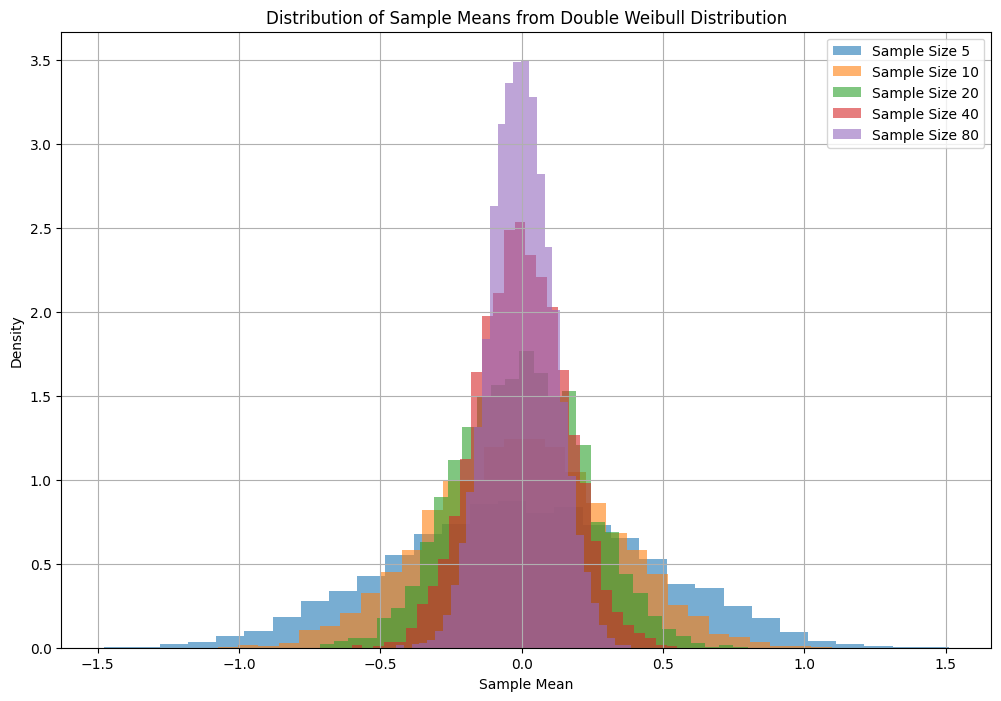

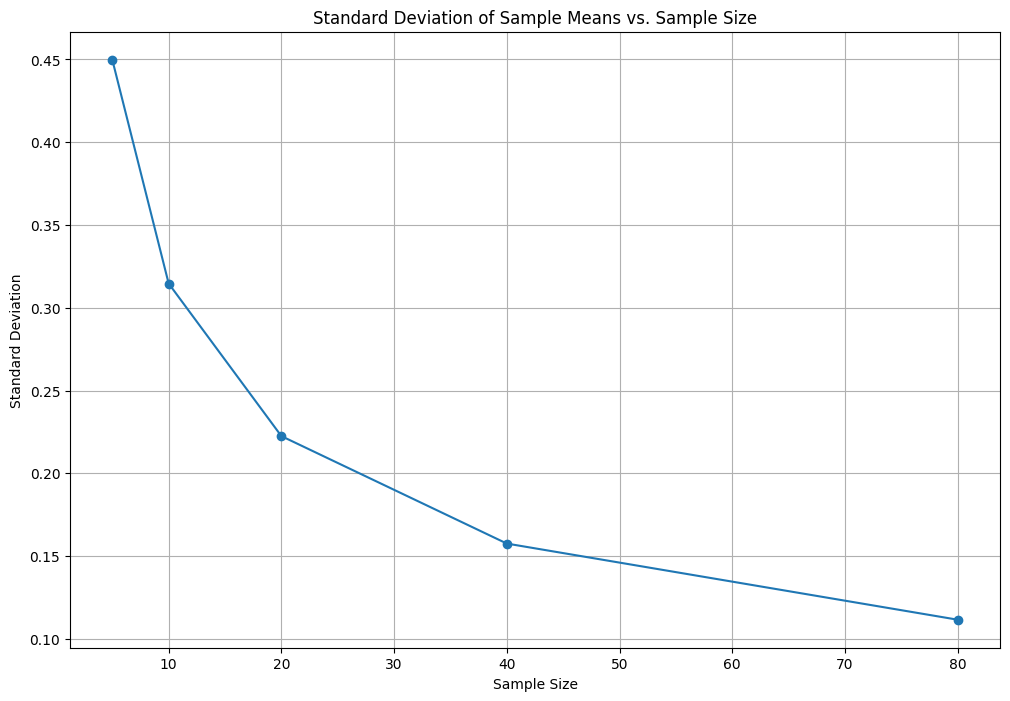

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dweibull
from scipy.stats import t

sample_sizes = [5, 10, 20, 40, 80]
num_samples = 5000

sample_means = {}
for N in sample_sizes:
    sample_means[N] = [np.mean(dweibull.rvs(2, size=N)) for _ in range(num_samples)]

plt.figure(figsize=(12, 8))
for N in sample_sizes:
    plt.hist(sample_means[N], bins=30, density=True, alpha=0.6, label=f'Sample Size {N}')
plt.title('Distribution of Sample Means from Double Weibull Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

std_dev = [np.std(sample_means[N]) for N in sample_sizes]

plt.figure(figsize=(12, 8))
plt.plot(sample_sizes, std_dev, marker='o', linestyle='-')
plt.title('Standard Deviation of Sample Means vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

We can see that the standard deviation decreases as the square root of the sample size increases from 5 to 80.

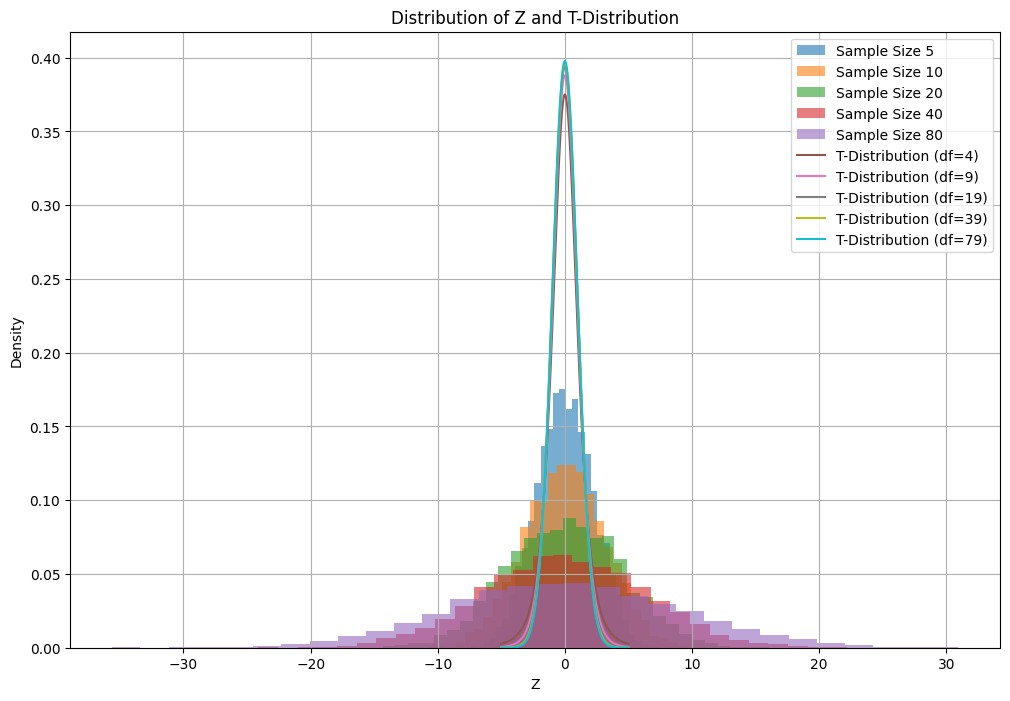

In [42]:
z = {}
for N in sample_sizes:
    z[N] = (np.sqrt(N) * (np.array(sample_means[N]) - np.mean(sample_means[N]))) / np.std(sample_means[N])

plt.figure(figsize=(12, 8))
for N in sample_sizes:
    plt.hist(z[N], bins=30, density=True, alpha=0.6, label=f'Sample Size {N}')

x = np.linspace(-5, 5, 1000)
for N in sample_sizes:
    df = N - 1
    t_dist = t.pdf(x, df)
    plt.plot(x, t_dist, label=f'T-Distribution (df={df})')

plt.title('Distribution of Z and T-Distribution')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()